In [1]:
import pandas
from pandas.plotting import scatter_matrix
import matplotlib.pyplot as plt
from sklearn import model_selection
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC

import warnings
warnings.filterwarnings('ignore')

In [2]:
dataset = pandas.read_csv("Pokemon.csv")

In [3]:
print(dataset.head(5))

   #                   Name Type 1  Type 2  Total  HP  Attack  Defense  \
0  1              Bulbasaur  Grass  Poison    318  45      49       49   
1  2                Ivysaur  Grass  Poison    405  60      62       63   
2  3               Venusaur  Grass  Poison    525  80      82       83   
3  3  VenusaurMega Venusaur  Grass  Poison    625  80     100      123   
4  4             Charmander   Fire     NaN    309  39      52       43   

   Sp. Atk  Sp. Def  Speed  Generation  Legendary  
0       65       65     45           1      False  
1       80       80     60           1      False  
2      100      100     80           1      False  
3      122      120     80           1      False  
4       60       50     65           1      False  


In [4]:
dataset = dataset[['HP','Attack','Defense','Sp. Atk','Sp. Def','Speed','Legendary','Generation','Type 1']]

In [5]:
dataset = dataset[dataset['Type 1'] != 'Flying']

In [6]:
print(dataset.head(5))

   HP  Attack  Defense  Sp. Atk  Sp. Def  Speed  Legendary  Generation Type 1
0  45      49       49       65       65     45      False           1  Grass
1  60      62       63       80       80     60      False           1  Grass
2  80      82       83      100      100     80      False           1  Grass
3  80     100      123      122      120     80      False           1  Grass
4  39      52       43       60       50     65      False           1   Fire


In [7]:
array = dataset.values
X = array[:,0:8]
Y = array[:,8]
validation_size = 0.20
seed = 7
X_train, X_validation, Y_train, Y_validation = model_selection.train_test_split(X, Y, test_size=validation_size, random_state=seed)

In [8]:
seed = 7
scoring = 'accuracy'

In [9]:
models = []
models.append(('LR', LogisticRegression(solver='liblinear', multi_class='ovr')))
models.append(('LDA', LinearDiscriminantAnalysis()))
models.append(('KNN', KNeighborsClassifier()))
models.append(('CART', DecisionTreeClassifier()))
models.append(('NB', GaussianNB()))
models.append(('SVM', SVC(gamma='auto')))
# evaluate each model in turn
results = []
names = []
for name, model in models:
    kfold = model_selection.KFold(n_splits=8, random_state=seed)
    cv_results = model_selection.cross_val_score(model, X_train, Y_train, cv=kfold, scoring=scoring)
    results.append(cv_results)
    names.append(name)
    msg = "%s: %f (%f)" % (name, cv_results.mean(), cv_results.std())
    print(msg)

LR: 0.232832 (0.032424)
LDA: 0.237540 (0.040118)
KNN: 0.209059 (0.043557)
CART: 0.157199 (0.026441)
NB: 0.113212 (0.021731)
SVM: 0.146242 (0.019982)


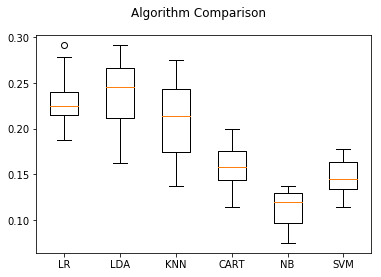

In [10]:
fig = plt.figure()
fig.suptitle('Algorithm Comparison')
ax = fig.add_subplot(111)
plt.boxplot(results)
ax.set_xticklabels(names)
plt.show()

In [11]:
from sklearn.model_selection import train_test_split

In [12]:
X = dataset.drop('Type 1',axis=1)
y = dataset['Type 1']

In [13]:
X_train, X_test, y_train, y_test = train_test_split(X, y)

In [14]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(X_train)
StandardScaler(copy=True, with_mean=True, with_std=True)
X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

In [15]:
from sklearn.neural_network import MLPClassifier
mlp = MLPClassifier(hidden_layer_sizes=(1000,1000,1000,1000,1000,1000),max_iter=10000)
mlp.fit(X_train,y_train)

MLPClassifier(activation='relu', alpha=0.0001, batch_size='auto', beta_1=0.9,
       beta_2=0.999, early_stopping=False, epsilon=1e-08,
       hidden_layer_sizes=(1000, 1000, 1000, 1000, 1000, 1000),
       learning_rate='constant', learning_rate_init=0.001, max_iter=10000,
       momentum=0.9, n_iter_no_change=10, nesterovs_momentum=True,
       power_t=0.5, random_state=None, shuffle=True, solver='adam',
       tol=0.0001, validation_fraction=0.1, verbose=False,
       warm_start=False)

In [16]:
predictions = mlp.predict(X_test)
from sklearn.metrics import classification_report,confusion_matrix
print(confusion_matrix(y_test,predictions))
print(classification_report(y_test,predictions))

[[ 6  0  1  2  0  0  0  0  1  1  0  2  0  1  2  0  1]
 [ 1  4  0  0  0  0  0  0  0  0  0  1  0  0  1  0  2]
 [ 0  1  4  0  0  0  0  0  1  0  0  1  0  0  0  0  2]
 [ 0  0  0  3  0  0  1  1  0  0  0  0  0  1  1  0  2]
 [ 0  0  0  0  2  0  0  0  0  0  0  0  0  2  0  0  0]
 [ 0  0  0  0  0  1  0  0  0  0  0  1  0  0  0  0  1]
 [ 1  0  0  0  0  0  4  0  2  1  3  1  0  3  0  0  4]
 [ 1  1  0  1  0  0  0  2  0  0  0  0  0  1  0  0  1]
 [ 0  0  0  4  0  0  1  2  4  0  0  2  0  1  2  0  5]
 [ 0  0  0  0  0  0  0  0  1  5  1  0  0  0  0  0  1]
 [ 0  0  0  0  0  0  0  0  0  0  0  1  0  0  1  0  2]
 [ 2  0  1  0  0  1  0  0  2  2  0 11  2  0  0  0  6]
 [ 1  0  0  0  1  1  0  0  1  0  0  3  0  0  0  0  1]
 [ 0  0  1  2  0  0  1  1  1  0  1  0  0  8  0  0  2]
 [ 1  0  0  0  0  2  0  0  0  0  0  0  0  1  1  0  1]
 [ 1  0  0  0  0  0  1  2  0  0  0  0  0  0  0  3  1]
 [ 2  2  0  0  0  0  0  0  6  0  0  4  4  0  1  0  4]]
              precision    recall  f1-score   support

         Bug       0.38   